<a href="https://colab.research.google.com/github/helarebah/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
filename = "/content/sales_predictions_2023.csv"

In [ ]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?



In [ ]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?



In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.



In [ ]:
df.duplicated().sum()
# there is no duplicated rows

0

4) Identify missing values.



In [ ]:
df.isna().sum()
# there is 1463 missing values in the column "Item_Weight" and 2410 missing values in the column "Outlet_Size"

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [ ]:
# we will start by the missing values in the colomn "Outlet_Size"
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# we want now to extract the data of the colomn "Outlet_Establishment_Year" where the values in the colomn "Outlet_Size" are not missing
df[df['Outlet_Size'].notna()].groupby('Outlet_Size')['Outlet_Establishment_Year'].unique()

Outlet_Size
High                  [1987]
Medium    [1999, 2009, 1985]
Small     [1997, 2004, 1985]
Name: Outlet_Establishment_Year, dtype: object

In [ ]:
# now, we want to extract the values of the colomn "Outlet_Establishment_Year" where the values in the colomn "Outlet_Size" are missing
missing_data_by_year = df[df['Outlet_Size'].isna()].groupby('Outlet_Establishment_Year').size()
missing_data_by_year
# We can notice here that the missing values in the colomn "Outlet_Size" are only related with the years 1998, 2002 and 2007

Outlet_Establishment_Year
1998    555
2002    929
2007    926
dtype: int64

In [ ]:
# that's why i decided to drop the rows where there is a missing value in the column "Outlet_Size"
df.dropna(subset=['Outlet_Size'], inplace=True)

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# then, we will drop the colomn "Item_Weight" because it's considered as irrelevant data because it doesn't affect the sales
df.drop("Item_Weight", axis=1, inplace=True)

In [ ]:
# now, we will clean the data by dropping colomns that does not affect the sales : "Item_Identifier", "Outlet_Identifier"and "Outlet_Establishment_Year"
df.drop(columns = ["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"], inplace = True )

6) Confirm that there are no missing values after addressing them.



In [ ]:
df.isna().sum()

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

 Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [ ]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Hard Drinks', 'Frozen Foods', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [ ]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [ ]:
df["Item_Fat_Content"].unique()
# as we can see here, there is inconsistent categories like LF and low fat for "Low Fat"

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [ ]:
# we are going to fix this inconsistent categorie of data
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Regular")

In [ ]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Low Fat")

In [ ]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)



In [ ]:
df.describe().loc[['min', 'max', 'mean']]

,Item_Visibility,Item_MRP,Item_Outlet_Sales
min,0.000000,31.290000,33.955800
max,0.328391,266.888400,13086.964800
mean,0.064505,141.256859,2322.688445


# **Part** **3**

Histogram to view the distributions of various features in your dataset.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
5,Regular,0.000000,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...
8517,Low Fat,0.083607,Frozen Foods,178.8318,Small,Tier 1,Supermarket Type1,3608.6360
8518,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8520,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


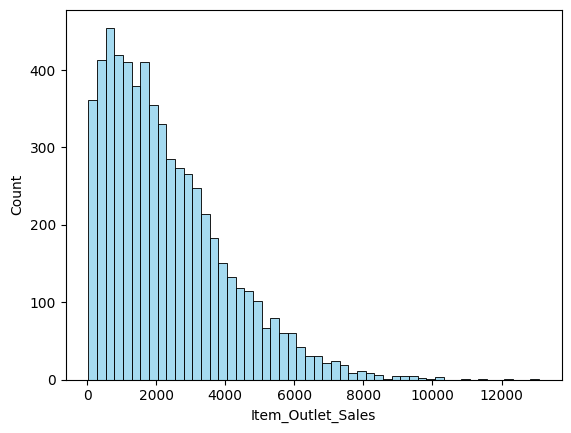

In [53]:
sns.histplot(data=df, x='Item_Outlet_Sales', y=None, bins = "auto", color ="skyblue");

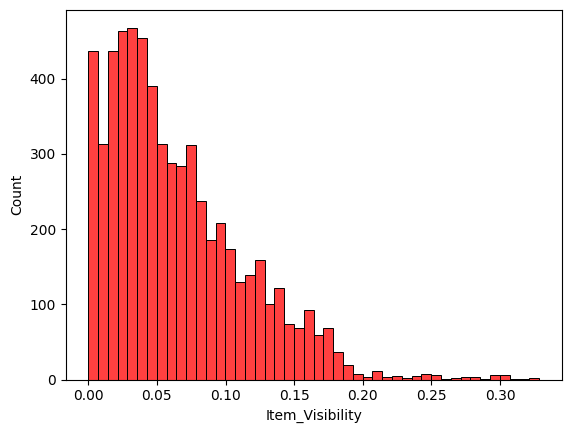

In [54]:
sns.histplot(data=df, x='Item_Visibility', y=None, bins = "auto", color = "red");

Boxplot to view statistical summaries of various features in your dataset.


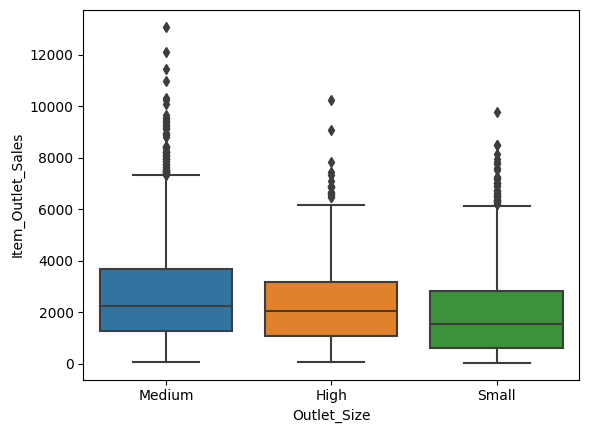

In [ ]:
sns.boxplot(data = df, x = "Outlet_Size", y = "Item_Outlet_Sales");

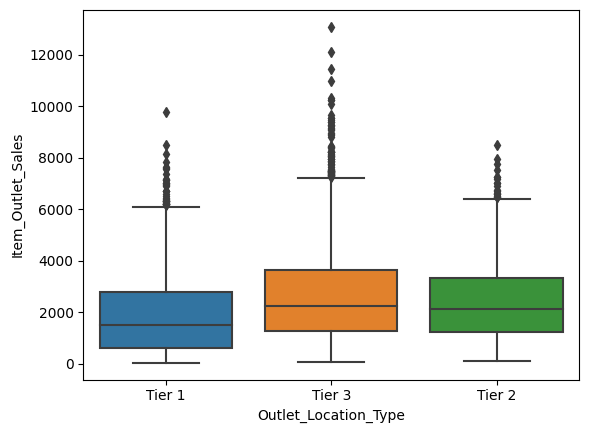

In [ ]:
sns.boxplot(data = df, x = "Outlet_Location_Type", y = "Item_Outlet_Sales");

Heatmap of the correlation between features.


In [ ]:
corr = df.corr()
corr

<ipython-input-50-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Visibility,1.000000,-0.000651,-0.105854
Item_MRP,-0.000651,1.000000,0.588939
Item_Outlet_Sales,-0.105854,0.588939,1.000000


<Axes: >

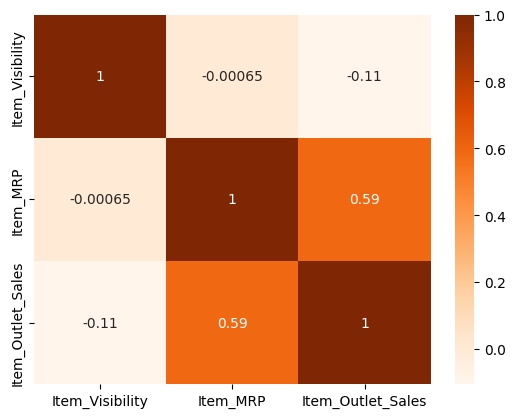

In [ ]:
sns.heatmap(corr, cmap = 'Oranges', annot = True)